In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose   

In [2]:
# 드라이브 사용 설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 데이터 살펴보기

train.csv : 모델을 학습하는 데 사용하는 데이터  
test.csv : 모델을 통하여 따릉이 대여량을 예측하는 데 사용하는 데이터  
sample_submission.csv : test데이터의 예측 값을 저장하여 제출하기 위한 데이터

In [3]:
# 줄마다 마지막에 띄어쓰기 두번하면 줄이 나뉜다!

## 1.1. 데이터 준비

read_csv() 메소드 이용하기

In [4]:
# 데이터 로드
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/따릉이/sample_submission.csv')

## 1.2. 데이터 확인

head()  
tail()  
info()  
shape

In [5]:
# 데이터 상위 5개 행 출력
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [6]:
# 데이터 하위 5개 행 출력
train.tail()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053
272,2020-06-30,120.797,3.622,0.432,5.574,77.061,19.125,26.053,41.284,38086


In [7]:
# 데이터 결측치 및 변수들의 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [8]:
# 데이터 행, 열 출력
train.shape

(273, 10)

## 1.3. 데이터 통계치 확인

In [9]:
train.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


# 2. 데이터 전처리

EDA를 하기 위한 데이터 선행처리

## 2.1. 'date_time' 열 쪼개기

In [10]:
train['date_time']

0      2018-04-01
1      2018-04-02
2      2018-04-03
3      2018-04-04
4      2018-04-05
          ...    
268    2020-06-26
269    2020-06-27
270    2020-06-28
271    2020-06-29
272    2020-06-30
Name: date_time, Length: 273, dtype: object

In [11]:
# 이건 _ 일때 가능하다! .으로 이름이 되어있다면 불가능!
train.date_time

0      2018-04-01
1      2018-04-02
2      2018-04-03
3      2018-04-04
4      2018-04-05
          ...    
268    2020-06-26
269    2020-06-27
270    2020-06-28
271    2020-06-29
272    2020-06-30
Name: date_time, Length: 273, dtype: object

#### split 분리

In [12]:
train['date_time'][0].split('-')

['2018', '04', '01']

In [13]:
train['date_time'][0].split('-')[1]

'04'

In [14]:
year, month, day = train['date_time'][0].split('-')
print('년 : ' + year)
print('월 : ' + month)
print('일 : ' + day)

년 : 2018
월 : 04
일 : 01


In [15]:
train['date_time'].apply(lambda x : x.split('-'))

0      [2018, 04, 01]
1      [2018, 04, 02]
2      [2018, 04, 03]
3      [2018, 04, 04]
4      [2018, 04, 05]
            ...      
268    [2020, 06, 26]
269    [2020, 06, 27]
270    [2020, 06, 28]
271    [2020, 06, 29]
272    [2020, 06, 30]
Name: date_time, Length: 273, dtype: object

In [16]:
train['date_time'].apply(lambda x : x.split('-')[0])

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
268    2020
269    2020
270    2020
271    2020
272    2020
Name: date_time, Length: 273, dtype: object

In [17]:
def temp(x):
  return x.split('-')[0]

train['date_time'].map(temp)

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
268    2020
269    2020
270    2020
271    2020
272    2020
Name: date_time, Length: 273, dtype: object

#### map, apply

- apply는 데이터프레임에 적용 가능
- map은 시리즈에서만 가능
- map은 특정열에서만 적용가능

In [18]:
train.apply(lambda x : x*2) # 다바꾸는거 가능!

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-012018-04-01,415.000,8.000,0.000,6.100,150.000,25.200,42.000,60.000,45988
1,2018-04-022018-04-02,416.634,5.900,0.000,6.556,139.666,25.624,38.000,39.000,56278
2,2018-04-032018-04-03,427.032,5.822,0.000,5.380,149.758,20.624,30.632,38.226,53634
3,2018-04-042018-04-04,287.672,7.384,0.850,6.276,143.698,16.624,24.736,86.986,52068
4,2018-04-052018-04-05,191.810,8.000,1.446,6.372,147.568,11.750,20.842,126.756,5666
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-262020-06-26,457.324,7.960,0.446,4.542,156.756,41.000,55.052,72.972,192300
269,2020-06-272020-06-27,415.540,5.730,0.162,3.588,156.824,41.624,57.684,42.162,214002
270,2020-06-282020-06-28,565.136,3.460,0.000,3.640,145.472,42.000,58.106,14.594,197136
271,2020-06-292020-06-29,274.054,4.514,0.176,4.086,140.946,39.250,52.000,31.082,140106


In [19]:
# train.map(lambda x : x*2) 불가능

In [20]:
# map은 특정열에서만 적용가능
train['date_time'].map(lambda x : x*2)

0      2018-04-012018-04-01
1      2018-04-022018-04-02
2      2018-04-032018-04-03
3      2018-04-042018-04-04
4      2018-04-052018-04-05
               ...         
268    2020-06-262020-06-26
269    2020-06-272020-06-27
270    2020-06-282020-06-28
271    2020-06-292020-06-29
272    2020-06-302020-06-30
Name: date_time, Length: 273, dtype: object

In [21]:
#바꾸길 원하는 것에 더블클릭후 컨트롤 D 누르면 다중선택 가능 그리고 바로 변경 가능

train['year'] = train['date_time'].apply(lambda x : x.split('-')[0]) #년
train['month'] = train['date_time'].apply(lambda x : x.split('-')[1]) #월
train['day'] = train['date_time'].apply(lambda x : x.split('-')[2]) #일

# 혹은 
#train['year'] = train['date_time'].map(lambda x : x.split('-')[0]) #년
#train['month'] = train['date_time'].map(lambda x : x.split('-')[1]) #월
#train['day'] = train['date_time'].map(lambda x : x.split('-')[2]) #일

In [22]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,04,01
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,04,02
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,04,03
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,04,04
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,04,05


## 2.2. 요일 정보 추가 (week_day 열 생성)

In [23]:
week_day = pd.to_datetime(train['date_time']).dt.day_name()
week_day

0         Sunday
1         Monday
2        Tuesday
3      Wednesday
4       Thursday
         ...    
268       Friday
269     Saturday
270       Sunday
271       Monday
272      Tuesday
Name: date_time, Length: 273, dtype: object

In [24]:
train['week_day']= week_day

In [25]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,04,01,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,04,02,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,04,03,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,04,04,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,04,05,Thursday


## 2.3. 가공한 변수 타입 변경

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
 10  year                       273 non-null    object 
 11  month                      273 non-null    object 
 12  day                        273 non-null    object 
 13  week_day                   273 non-null    object 

In [27]:
#train['year'] = train['year'].apply(lambda x : int(x)) -> astype 과 같은 방법 같은 결과 도출
train['year'] = train['year'].astype('int')

In [28]:
train['month'] = train['month'].astype('int')
train['day'] = train['day'].astype('int')

In [29]:
train.week_day.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [30]:
train.loc[train['week_day'] == 'Sunday', 'week_day'] = 0
train.loc[train['week_day'] == 'Monday', 'week_day'] = 1
train.loc[train['week_day'] == 'Tuesday', 'week_day'] = 2
train.loc[train['week_day'] == 'Wednesday', 'week_day'] = 3
train.loc[train['week_day'] == 'Thursday', 'week_day'] = 4
train.loc[train['week_day'] == 'Friday', 'week_day'] = 5
train.loc[train['week_day'] == 'Saturday', 'week_day'] = 6

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
 10  year                       273 non-null    int64  
 11  month                      273 non-null    int64  
 12  day                        273 non-null    int64  
 13  week_day                   273 non-null    object 

In [32]:
train['week_day'] = train['week_day'].astype('int')

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
 10  year                       273 non-null    int64  
 11  month                      273 non-null    int64  
 12  day                        273 non-null    int64  
 13  week_day                   273 non-null    int64  

# 3. EDA

가설 설정

1. 주중에 비해서 주말에 따릉이 대여량이 증가 할 것이다.
2. 날씨가 덥고 습하다면 따릉이 대여량이 감소 할 것이다.
3. 날씨가 춥고 바람이 많이 분다면 따릉이 대여량이 감소 할 것이다.

## 3.1. 시각화

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
plt.rcParams['font.size'] = 15
plt.style.use('ggplot')
plt.rc('font', family='NanumGothic')

### 3.1.1. Target

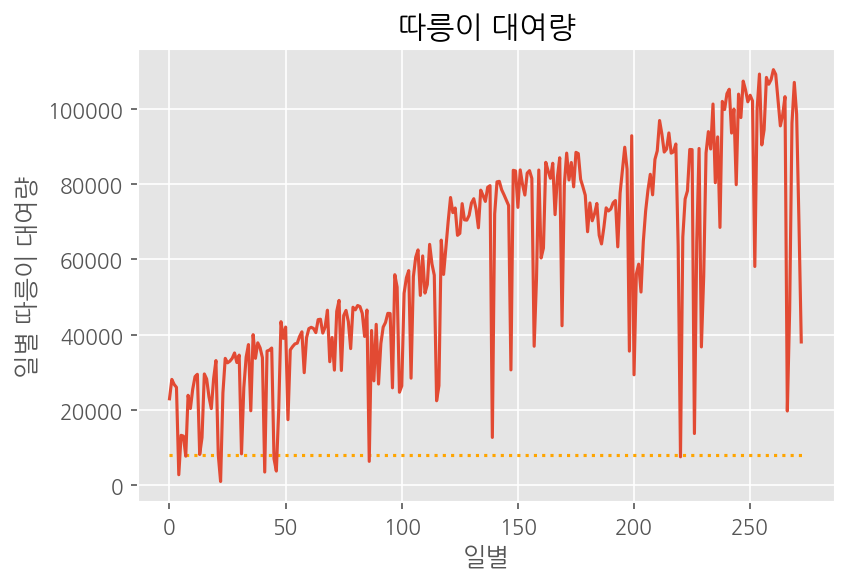

In [35]:
plt.figure(dpi = 150)

x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

plt.title("따릉이 대여량")
plt.xlabel("일별")
plt.ylabel("일별 따릉이 대여량")
plt.hlines(y=8000, xmin=0, xmax=len(x), color='Orange', linestyle='dotted')
plt.plot(x,y)
plt.show()

* 인사이트

1. 시간이 흐를수록 대여량이 증가하고있다 -> 연도별 차이
2. 이상치가 존재한다
3. 평일에는 출근을 하니까 대여량이 주말보다 많을까? -> 요일별 차이

## 3.1.2. 연도별 따릉이 대여량

인사이트1 : 시간이 흐를수록 대여량이 증가하고있다 

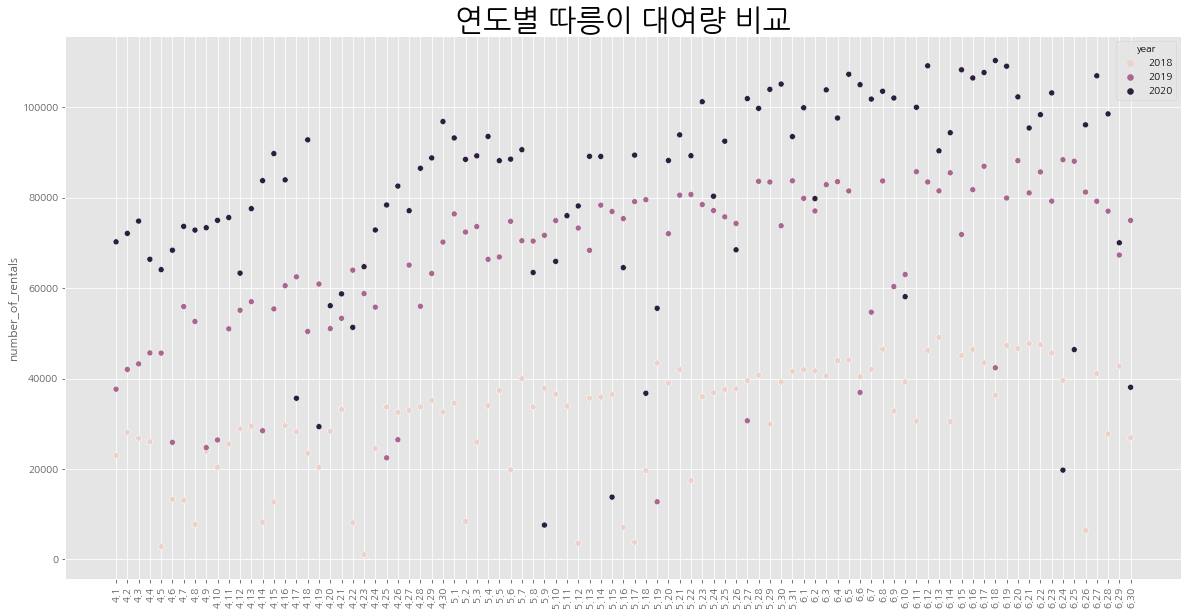

In [36]:
month_day = train['month'].astype(str) + '.' + train['day'].astype(str)

plt.figure(figsize=(20,10))
sns.scatterplot(x=month_day, y=train['number_of_rentals'], hue=train['year']) # hue: 분화하기
plt.xticks(rotation=90)
plt.title('연도별 따릉이 대여량 비교', fontsize = 30)
plt.show()

* 결론

Year은 매우 중요한 변수이고,

Year을 반영하는 파생 변수를 생성해도 좋겠다!

## 3.1.3.  평일과 주말 대여량

인사이트 3 : 평일에는 출근을 하니까 대여량이 주말보다 많을까?

가설 1

In [37]:
weekend = train[(train['week_day'] == 0) | (train['week_day'] == 6)] # 일요일과 토요일 -> 주말을 나타내는 데이터 프레임

In [38]:
weekday = train[(train['week_day'] != 0) & (train['week_day'] != 6)] # 일요일과 토요일 아닌 -> 평일을 나타내는 데이터 프레임

In [39]:
weekend.mean().number_of_rentals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


58988.64102564102

In [40]:
weekday.mean().number_of_rentals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


59809.51282051282

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


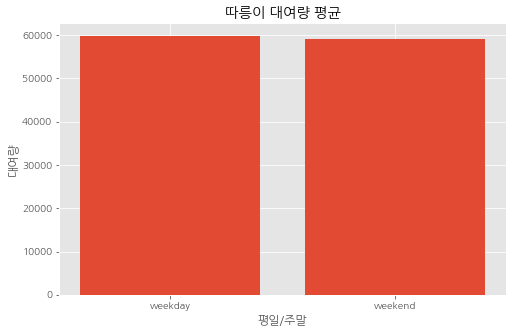

In [41]:
x = ['weekday', 'weekend']
y = [weekday.mean().number_of_rentals, weekend.mean().number_of_rentals]

plt.figure(figsize = (8,5))
plt.title("따릉이 대여량 평균")
plt.xlabel('평일/주말')
plt.ylabel('대여량')
plt.bar(x, y)
plt.show()

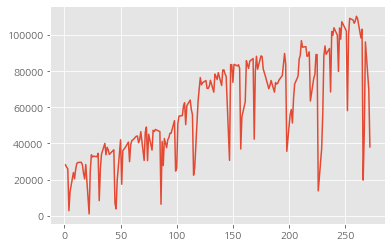

In [42]:
weekday.number_of_rentals.plot()

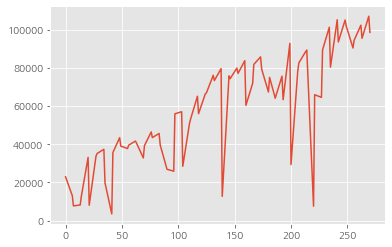

In [43]:
weekend.number_of_rentals.plot()

* 결론

평일과 주말의 따릉이 대여량은 별 차이가 없다고 말할 수 있다!

## 3.1.4. 요일별 대여량

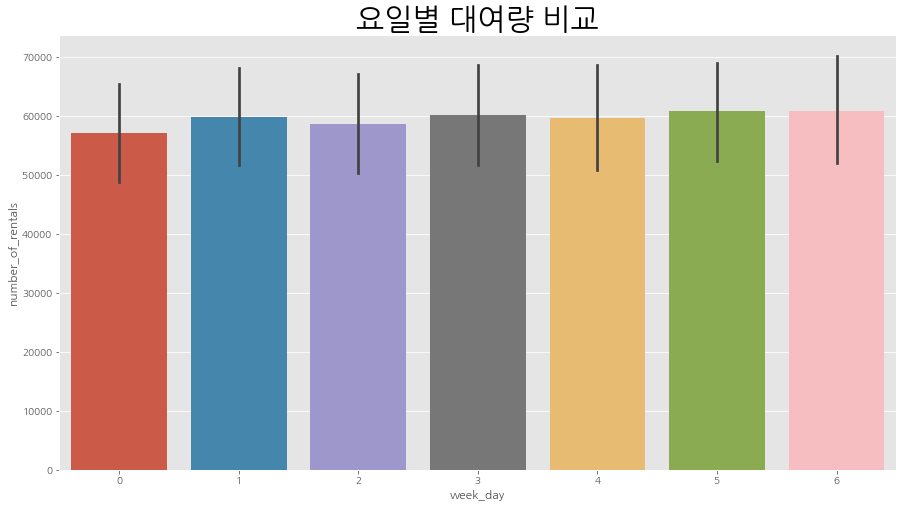

In [44]:
plt.figure(figsize=(15,8))

sns.barplot(x=train['week_day'], y=train['number_of_rentals'])
plt.title('요일별 대여량 비교', fontsize = 30)
plt.show()

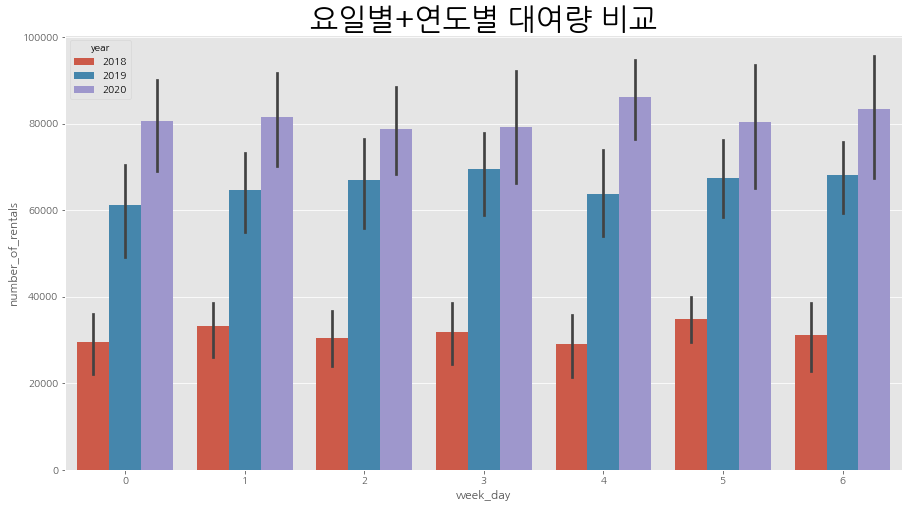

In [45]:
plt.figure(figsize=(15,8))

sns.barplot(x=train['week_day'], y=train['number_of_rentals'], hue=train['year'])
plt.title('요일별+연도별 대여량 비교', fontsize = 30)
plt.show()

* 결론

요일이라는 변수는 따릉이 대여량에 영향을 크게 미치지 않는다

따라서 drop을 해줘도 괜찮겠다!

## 3.1.5 더위+습도 = 더위 점수

가설2. 날씨가 덥고 습하다면 따릉이 대여량 감소

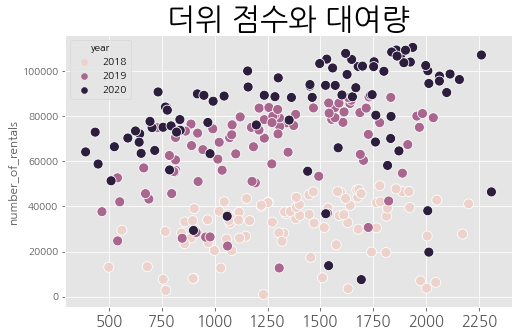

In [46]:
from seaborn.relational import scatterplot
hot_score = train['high_temp'] * train['humidity'] # 높은 온도와 높은 습도 *

plt.figure(figsize=(8,5))
sns.scatterplot(x=hot_score, y=train['number_of_rentals'], hue=train['year'], s = 100 )
plt.xticks(fontsize=15)
plt.title('더위 점수와 대여량', fontsize = 30)
plt.show()

* 결론

더위 점수가 따릉이 대여량이 영향을 준다  
: 파생변수 '더위 점수'

## 3.1.6. 추위 점수

가설3 : 날씨가 춥고 바람이 많이 불면 따릉이 대여량이 감소할 것이다.

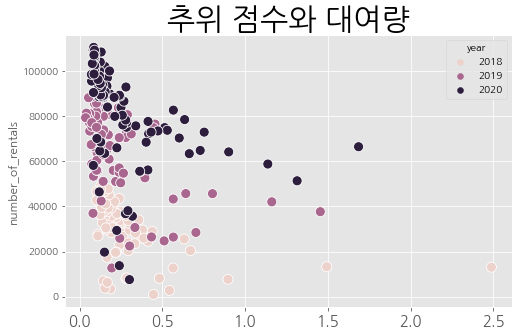

In [47]:
cold_score = train['wind_speed'] / train['low_temp'] # 바람 높고 온도 낮다 /

plt.figure(figsize=(8,5))
sns.scatterplot(x = cold_score, y=train['number_of_rentals'], hue=train['year'], s = 100 )
plt.xticks(fontsize=15)
plt.title('추위 점수와 대여량', fontsize = 30)
plt.show()

* 결론 

추위 점수가 따릉이 대여량에 영향을 미칠 것이다 (음의 상관관계)

: 추위 점수라는 파생변수를 생성

## 3.1.7. 이상치 확인

In [48]:
train.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022,2019.000000,5.000000,15.670330,3.000000
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774,0.817996,0.813489,8.774195,2.003673
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000,2018.000000,4.000000,1.000000,0.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000,2018.000000,4.000000,8.000000,1.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000,2019.000000,5.000000,16.000000,3.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000,2020.000000,6.000000,23.000000,5.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000,2020.000000,6.000000,31.000000,6.000000


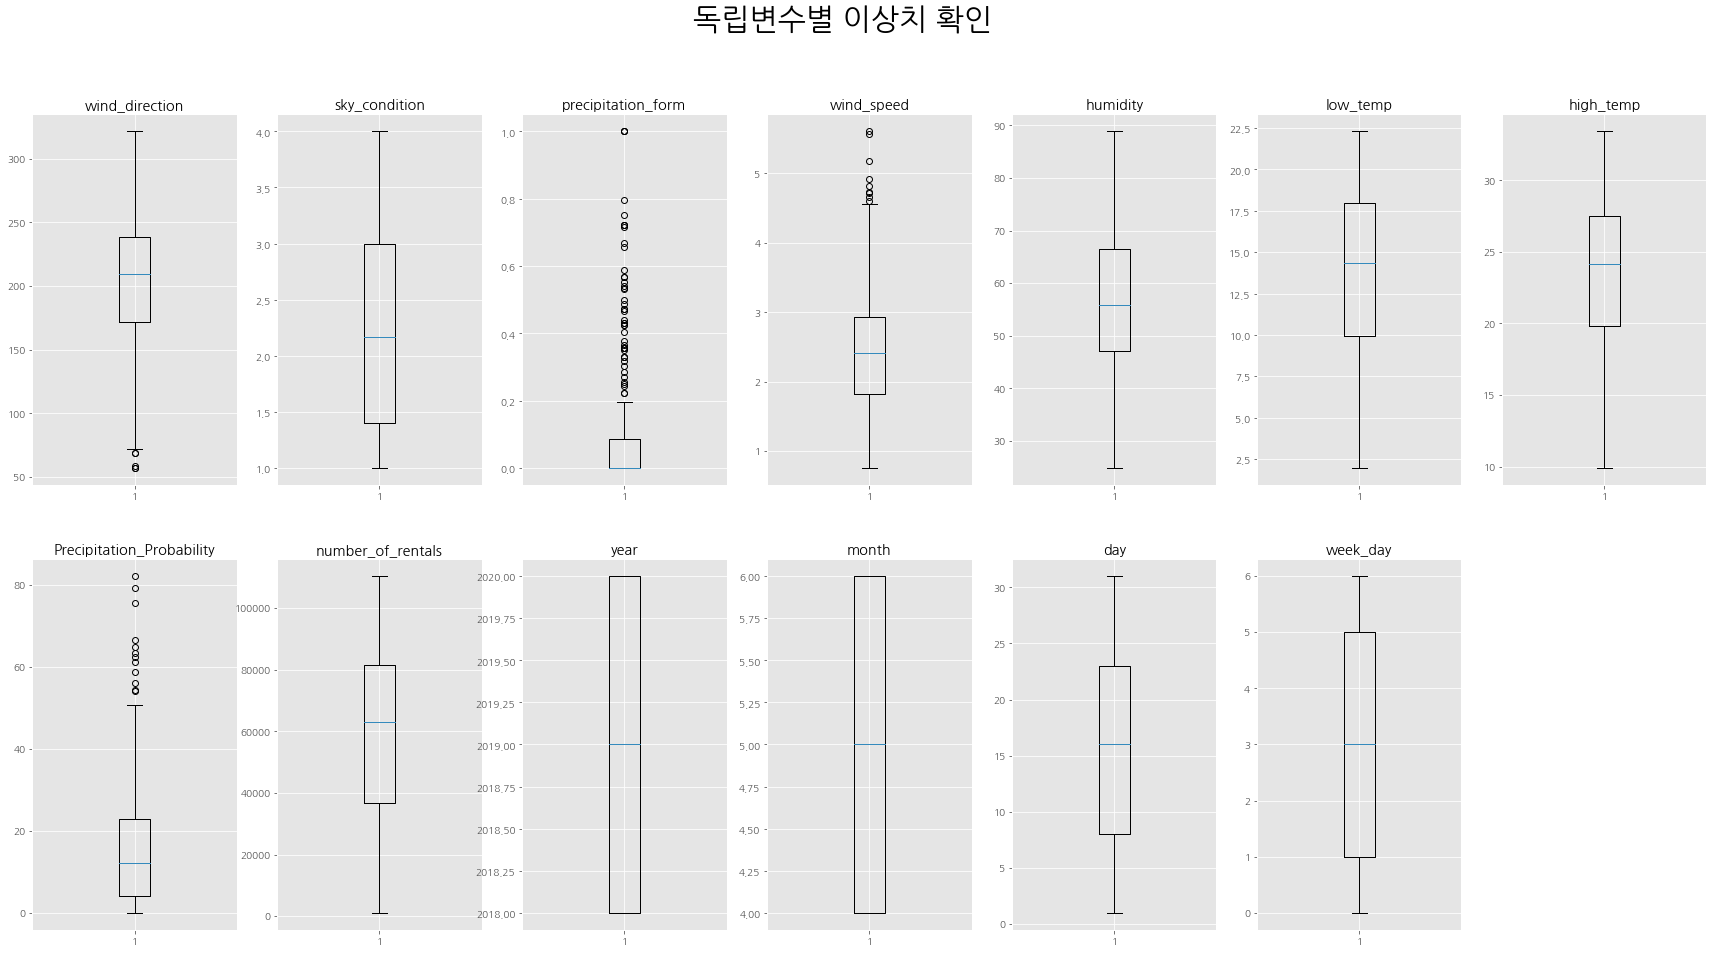

In [49]:
plt.style.use("ggplot")

feature = train.describe().columns

plt.figure(figsize=(30,15))
plt.suptitle("독립변수별 이상치 확인", fontsize = 30)

for i in range(len(feature)):
  plt.subplot(2,7,i+1)
  plt.title(feature[i])
  plt.boxplot(train[feature[i]])
plt.show()

# 이상치가 없는 듯하다. 강수형태는 이상치라고 보기에는 애매

## 3.1.8. 상관관계

가로를 봐주자

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


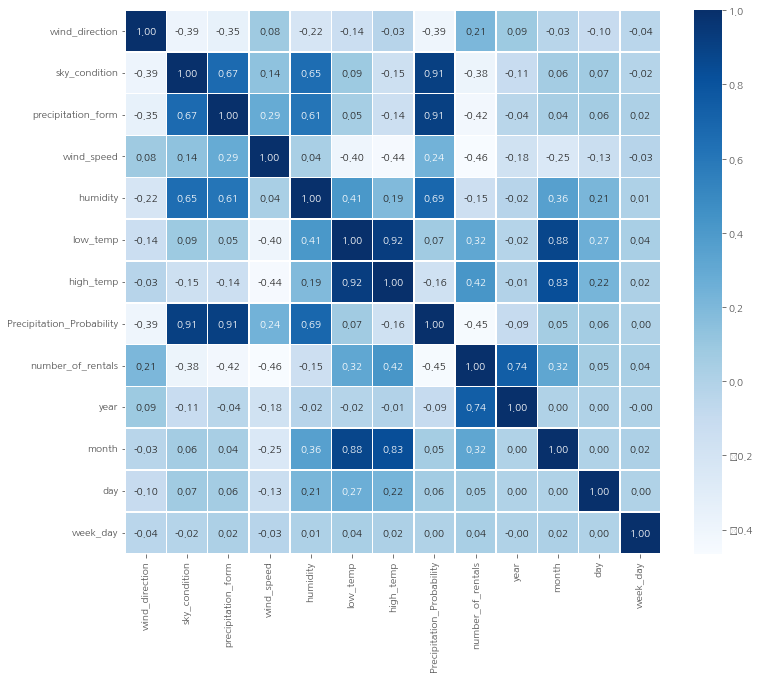

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(data = train.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

## 3.2. 가설 검정 및 총 정리

3.1.1. : 타겟을 통하여 3가지 인사이트 도출  
3.1.2. : 연도별 대여량이 증가 하므로 , Year 관한 변수 하나 생성  
3.1.3. : 가설 1 : 평일과 주말의 대여량 차이는 X  
3.1.4. : 가설 1 (파생) : 요일별 대여량도 차이가 없다  
3.1.5. : 가설 2 : 더위 점수는 대여량이 감소하는 것이아니라 오히려 증가했다  
3.1.6. : 가설 3 : 추위 점수는 대여량이 감소하였다.  
3.1.7. : 이상치에서는 특이한 이상치 발견 X  
3.1.8. : 피어슨 상관계수를 통한 전반적인 피처의 상관관계를 도출  

: Year 인플레이션 변수 생성, 더위 점수 생성, 추위 점수 생성, 요일, 날짜, 일 변수 삭제

# 4. Feature Engineering

## 4.1. Feature Extraction

### 4.1.1. Year inflation

In [51]:
train[train['year']==2018]['number_of_rentals']

0     22994
1     28139
2     26817
3     26034
4      2833
      ...  
86     6391
87    41128
88    27757
89    42765
90    26911
Name: number_of_rentals, Length: 91, dtype: int64

In [52]:
train[train['year']==2019]['number_of_rentals']

91     37660
92     42029
93     43257
94     45681
95     45643
       ...  
177    81274
178    79234
179    77056
180    67346
181    74994
Name: number_of_rentals, Length: 91, dtype: int64

In [53]:
train[train['year']==2020]['number_of_rentals']

182     70258
183     72129
184     74856
185     66405
186     64111
        ...  
268     96150
269    107001
270     98568
271     70053
272     38086
Name: number_of_rentals, Length: 91, dtype: int64

In [54]:
test

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459
...,...,...,...,...,...,...,...,...,...
86,2021-06-26,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486
87,2021-06-27,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378
88,2021-06-28,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946
89,2021-06-29,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770


### 4.1.2. 피쳐 제거

In [55]:
train = train.drop(['week_day'], axis = 1)
train = train.drop(['day'], axis = 1)
train = train.drop(['date_time'], axis = 1)

In [56]:
train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4


### 4.1.3. 더위 및 추위 파생 변수 생성

In [57]:
train['hot_score'] = train['high_temp']*train['humidity']
train['cold_score'] = train['wind_speed']/train['low_temp']

In [58]:
train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,hot_score,cold_score
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1575.000000,0.242063
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,1326.827000,0.255854
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,1146.846764,0.260861
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,888.628432,0.377526
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,768.903064,0.542298


## 4.2. Feature Selection

axis = 0 : 인덱스(index)

axis = 1 : 열(columns)

In [59]:
#X = train.drop(['number_of_rentals'], axis = 1) 같은 방법

X = train[['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability',
       'year', 'month', 'hot_score', 'cold_score']]

y = train['number_of_rentals']

In [60]:
train.columns

Index(['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability',
       'number_of_rentals', 'year', 'month', 'hot_score', 'cold_score'],
      dtype='object')

# 5. Modeling

## 5.1. 모델 선택

#### 하이퍼파라미터

In [64]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1,high=200),
    'max_features':randint(low=1,high=8),
    'max_depth':randint(low=1,high=16),
    'min_samples_leaf':randint(low=1,high=20),
    'min_samples_split':randint(low=1,high=20)
}

rfr = RandomForestRegressor(random_state=42)
grid_cv = RandomizedSearchCV(rfr, param_distributions=param_distribs, n_iter=10,cv=5,
                       scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
grid_cv.fit(X,y)

cvres=grid_cv.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
  print(np.sqrt(-mean_score), params)


20289.518990503835 {'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 15, 'min_samples_split': 11, 'n_estimators': 72}
18494.31539200906 {'max_depth': 13, 'max_features': 5, 'min_samples_leaf': 7, 'min_samples_split': 19, 'n_estimators': 75}
16712.826431295485 {'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 152}
17509.538003419122 {'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 158}
21816.634641430384 {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 58}
18992.0399716079 {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 12, 'min_samples_split': 17, 'n_estimators': 59}
23974.29244111996 {'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 16, 'min_samples_split': 15, 'n_estimators': 190}
19558.734428949487 {'max_depth': 14, 'max_features': 7, 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 55}
24465.7006

In [65]:

model = RandomForestRegressor(max_depth=15,max_features=2, min_samples_leaf= 16, min_samples_split= 15, n_estimators= 190)

In [66]:
# 이방법도 가능!

#from sklearn.linear_model import LinearRegression

#model = LinearRegression()

## 5.2. 모델 학습

In [67]:
model.fit(X,y)

RandomForestRegressor(max_depth=15, max_features=2, min_samples_leaf=16,
                      min_samples_split=15, n_estimators=190)

## 5.3. 모델 예측

### 5.3.1. test 셋 데이터 처리

In [68]:
X

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,hot_score,cold_score
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1575.000000,0.242063
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,1326.827000,0.255854
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,1146.846764,0.260861
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,888.628432,0.377526
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,768.903064,0.542298
...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,2157.432828,0.110780
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,2261.558904,0.086200
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,2113.199008,0.086667
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,1832.298000,0.104102


### 5.3.1.1.  데이터 전처리 과정에서

In [69]:
# date_time 쪼개기 -> year, month, day
test['year'] = test['date_time'].apply(lambda x : x.split('-')[0])
test['month'] = test['date_time'].apply(lambda x : x.split('-')[1])
test['day'] = test['date_time'].apply(lambda x : x.split('-')[2])

# 요일 정보 추가
week_day = pd.to_datetime(test['date_time']).dt.day_name()
test['week_day'] = week_day

# 가공한 변수 타입 변경
test['year'] = test['year'].astype('int')
test['month'] = test['month'].astype('int')
test['day'] = test['day'].astype('int')

test.loc[test['week_day'] == 'Sunday', 'week_day'] = 0
test.loc[test['week_day'] == 'Monday', 'week_day'] = 1
test.loc[test['week_day'] == 'Tuesday', 'week_day'] = 2
test.loc[test['week_day'] == 'Wednesday', 'week_day'] = 3
test.loc[test['week_day'] == 'Thursday', 'week_day'] = 4
test.loc[test['week_day'] == 'Friday', 'week_day'] = 5
test.loc[test['week_day'] == 'Saturday', 'week_day'] = 6
test['week_day'] = test['week_day'].astype('int')

test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1,4
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2,5
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3,6
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4,0
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5,1


#### 5.4.1.2. Feature Extraction 과정

In [70]:
# 피쳐 제거
test = test.drop(['week_day'],axis = 1)
test = test.drop(['day'],axis = 1)
test = test.drop(['date_time'],axis = 1)

# 더위 점수
test['hot_score'] = test['high_temp'] * test['humidity']

# 추위 점수
test['cold_score'] = test['wind_speed'] / test['low_temp']

test.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,hot_score,cold_score
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,585.558111,0.245763
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,881.923000,0.221833
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,1264.558944,0.243944
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,1099.185984,0.599520
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,900.120384,0.217028


In [71]:
X

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,hot_score,cold_score
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1575.000000,0.242063
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,1326.827000,0.255854
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,1146.846764,0.260861
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,888.628432,0.377526
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,768.903064,0.542298
...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,2157.432828,0.110780
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,2261.558904,0.086200
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,2113.199008,0.086667
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,1832.298000,0.104102


In [72]:
test

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,hot_score,cold_score
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,585.558111,0.245763
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,881.923000,0.221833
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,1264.558944,0.243944
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,1099.185984,0.599520
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,900.120384,0.217028
...,...,...,...,...,...,...,...,...,...,...,...,...
86,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486,2021,6,2132.793612,0.052481
87,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378,2021,6,2036.844000,0.061983
88,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946,2021,6,2024.960682,0.080571
89,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770,2021,6,2073.386133,0.070000


### 5.3.2. test셋 예측

## Feature Engineering : Year Inflaction : 2020 -> 2021

In [73]:
x1 = sum(train[train['year']==2018]['number_of_rentals'])

x2 = sum(train[train['year']==2019]['number_of_rentals'])

x3 = sum(train[train['year']==2020]['number_of_rentals'])

x4 = sum(submission['number_of_rentals']) ## 2021

In [74]:
x1

2860617

In [75]:
x4

0

In [76]:
print(x4/x1)
print(x4/x2)
print(x4/x3)

0.0
0.0
0.0


In [77]:
# lr
def rental_rate_change(df):
    y1 = df[df['year'] == 2018]['number_of_rentals'] * 3.3859145348144577
    y2 = df[df['year'] == 2019]['number_of_rentals'] * 1.6157080615278123
    y3 = df[df['year'] == 2020]['number_of_rentals'] * 1.3073770268514862
    new = pd.concat([y1, y2, y3], axis=0).to_frame()
    df['inflaction_rentals'] = new['number_of_rentals']
    return True

# # concat 문자열 합치기

In [78]:
rental_rate_change(train)

True

In [79]:
train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,hot_score,cold_score,inflaction_rentals
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1575.000000,0.242063,77855.718814
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,1326.827000,0.255854,95276.249095
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,1146.846764,0.260861,90800.070080
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,888.628432,0.377526,88148.898999
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,768.903064,0.542298,9592.295877


In [80]:
X = train.drop(['number_of_rentals', 'inflaction_rentals'], axis=1 )
y = train['inflaction_rentals']

In [81]:
model = RandomForestRegressor(max_depth=15,max_features=2, min_samples_leaf= 16, min_samples_split= 15, n_estimators= 190)# RandomForestRegressor() 이 방법이 더 좋다.

In [82]:
model.fit(X,y)

RandomForestRegressor(max_depth=15, max_features=2, min_samples_leaf=16,
                      min_samples_split=15, n_estimators=190)

In [83]:
predict = model.predict(test)

In [84]:
submission['number_of_rentals'] = predict
submission.head()

,date_time,number_of_rentals
0,2021-04-01,91722.522583
1,2021-04-02,88651.023192
2,2021-04-03,62927.042547
3,2021-04-04,63769.892680
4,2021-04-05,95699.410457


In [85]:
submission.to_csv('submission_4.csv', index = False)